# Exercise 8-1: Analyze the Forest Fires data

Your name: Hima Tulasi
Date:7/26/2022
Summer 2022 Data Mining UNC Charlotte

In [1]:
# make sure pickle5 is installed, this gets complicated
# as some pickle versions are not backward compatible
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.3 MB/s 


In [21]:
import pickle5 as pickle


## Read the data

In [22]:
#I imported seaborn
import pandas as pd
import seaborn as sns

#### Upload the pickle file before executing the next code cell!

In [4]:
# upload using folder in colab or
# upload the file you want - here we will first select fires_by_month.pkl

#I uploaded fires_by_month.pkl
from google.colab import files
uploaded = files.upload()

Saving fires_by_month.pkl to fires_by_month.pkl


In [6]:
# Read the data from the file - using fires_cleaned, this may take a few minutes due to large file
# the result will be a dataframe
with open('fires_by_month.pkl', 'rb') as fid:
     fires_by_month = pickle.load(fid)

In [10]:
# fires_by_month = pd.read_pickle('fires_by_month.pkl')

In [7]:
# display the first five rows
fires_by_month.head()

,state,fire_year,fire_month,acres_burned,days_burning,fire_count
0,AK,1992,5,4202.0,135.0,14
1,AK,1992,6,86401.0,417.0,23
2,AK,1992,7,48516.7,500.0,26
3,AK,1992,8,3305.0,92.0,4
4,AK,1992,9,20.0,1.0,1


In [8]:
# display file info
fires_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   state         9300 non-null   category
 1   fire_year     9300 non-null   int64   
 2   fire_month    9300 non-null   int64   
 3   acres_burned  9300 non-null   float64 
 4   days_burning  9300 non-null   float64 
 5   fire_count    9300 non-null   int64   
dtypes: category(1), float64(2), int64(3)
memory usage: 372.9 KB


## Group and aggregate the data

In [9]:
# group the data by state and year
#I used an index so i can group by two columns
state_year_group = fires_by_month.groupby(['state','fire_year'])



In [52]:
# sum the grouped data and store DataFrame in fires_by_year variable
fires_by_year = state_year_group.sum()
fires_by_year.head(100)

fire_month  acres_burned  days_burning  fire_count
state fire_year                                                    
AK    1992               35     142444.70        1145.0          68
      1993               30     686630.50        3373.0         144
      1994               48     261604.70        2517.0         126
      1995               41      43762.60         880.0          48
      1996               40     598407.20        2112.0          88
...                     ...           ...           ...         ...
AZ    2015               78     154720.38         984.0         147
CA    1992               78     289254.90         434.0         819
      1993               78     315011.10         302.0         726
      1994               78     401619.20         727.0         720
      1995               74     210519.30         360.0         664

[100 rows x 4 columns]

In [54]:
# drop the fire_month column
fires_by_month = fires_by_month.drop(columns=['fire_month'])
fires_by_month.head(100)

,index,state,fire_year,acres_burned,days_burning,fire_count,decade
0,0,AK,1992,4202.0,135.0,14,1990s
1,1,AK,1992,86401.0,417.0,23,1990s
2,2,AK,1992,48516.7,500.0,26,1990s
3,3,AK,1992,3305.0,92.0,4,1990s
4,4,AK,1992,20.0,1.0,1,1990s
...,...,...,...,...,...,...,...
95,95,AK,2008,76038.5,972.0,38,2000s
96,96,AK,2008,129.6,3.0,2,2000s
97,97,AK,2008,30.0,36.0,1,2000s
98,98,AK,2009,1000.0,191.0,1,2000s


## Use pivot tables

In [55]:
# select rows where the year is 2013 or later
#i used to loc method to find years that were greater than 2013
twenty_thirteen_or_later = fires_by_month.loc[(fires_by_month['fire_year'] >= 2013)]
twenty_thirteen_or_later.head(100)

,index,state,fire_year,acres_burned,days_burning,fire_count,decade
123,123,AK,2013,26.80,270.0,1,2010s
124,124,AK,2013,80.00,0.0,1,2010s
125,125,AK,2013,509799.60,459.0,24,2010s
126,126,AK,2013,718737.00,2853.0,88,2010s
127,127,AK,2013,79399.40,803.0,26,2010s
...,...,...,...,...,...,...,...
915,915,AZ,2013,13.10,0.0,1,2010s
916,916,AZ,2014,126.30,1.0,4,2010s
917,917,AZ,2014,138.90,6.0,3,2010s
918,918,AZ,2014,83176.51,139.0,21,2010s


In [56]:
# use the pivot() method to pivot the data so the state values are used as row labels, 
# fire_year values are used as column labels, and acres_burned values are used as data
#I grouped by the columns used as row and column labels and then used state as the endex where it became the row label

fire_pivot = fires_by_month.groupby(['state', 'fire_year'], as_index=False).sum()

fire_pivot.pivot(index='state', columns='fire_year', values='acres_burned')

fire_year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
state,,,,,,,,,,,,,,,,,,,,,
AK,142444.70,686630.50,261604.70,43762.60,598407.20,2025818.00,120603.40000,1.005597e+06,756161.400,219707.70,...,2.543659e+05,6.341360e+05,9.226770e+04,2.949289e+06,1137138.500,292716.40,300344.80,1320518.500,233426.400000,5136372.99
AL,1098.00,2098.00,28220.70,31284.10,40463.00,17551.60,29082.80000,4.479460e+04,77610.600,33244.00,...,7.342410e+04,4.989490e+04,1.967910e+04,2.281375e+04,37479.620,50599.60,26897.50,28015.650,35310.200000,28386.96
AR,1239.00,1541.60,2081.90,4829.80,4951.40,9414.00,11024.20000,1.986190e+04,24568.000,12045.00,...,6.304700e+04,2.326650e+04,9.639450e+03,1.575625e+04,30528.400,43380.45,34583.66,11797.600,18521.800000,16302.96
AZ,40015.10,201204.60,221025.60,258315.90,185184.70,12165.40,25537.60000,7.221750e+04,90733.700,33797.01,...,1.795655e+05,1.139338e+05,1.128924e+05,2.205709e+05,86913.770,1036553.43,227705.05,102307.470,202212.510000,154720.38
CA,289254.90,315011.10,401619.20,210519.30,700022.40,319032.10,155287.80000,7.978873e+05,247752.600,344785.80,...,8.064270e+05,1.038271e+06,1.423523e+06,4.501132e+05,116298.410,186216.73,759592.08,575555.650,543033.330000,844674.02
CO,6905.20,34975.50,69315.00,19243.20,69335.80,5738.80,7920.90000,1.990730e+04,114930.300,22443.30,...,4.529520e+04,1.356928e+04,1.115024e+05,3.730460e+04,50913.000,126833.10,270749.00,161037.700,24488.270000,22599.10
CT,341.00,244.00,680.00,257.50,35.00,506.00,60.00000,1.310000e+03,365.000,491.00,...,1.930000e+02,1.020000e+02,1.785000e+03,6.900000e+01,231.000,89.00,333.00,0.000,0.000000,108.70
DE,120.00,0.00,95.00,2014.00,0.00,15.00,0.00000,5.000000e+02,65.000,10.50,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.00,0.00,12.000,0.000000,56.00
FL,88575.00,73211.20,98016.90,51930.40,100483.00,127811.80,371513.60000,4.061225e+05,233892.500,405312.00,...,2.466541e+05,5.409204e+05,1.805945e+05,1.404399e+05,59646.280,324473.92,134780.02,74046.020,153560.600000,162845.80


In [57]:
# use the pivot_table() method with the fires_by_month DataFrame to get the same result
# as the previous cell
#I made the same pivot as before but with the pivot_table method
acres_burned_each_year_by_state = fires_by_month.pivot_table(index='state', columns='fire_year', values='acres_burned', aggfunc='sum')
acres_burned_each_year_by_state

fire_year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
state,,,,,,,,,,,,,,,,,,,,,
AK,142444.70,686630.50,261604.70,43762.60,598407.20,2025818.00,120603.40000,1.005597e+06,756161.400,219707.70,...,2.543659e+05,6.341360e+05,9.226770e+04,2.949289e+06,1137138.500,292716.40,300344.80,1320518.500,233426.400000,5136372.99
AL,1098.00,2098.00,28220.70,31284.10,40463.00,17551.60,29082.80000,4.479460e+04,77610.600,33244.00,...,7.342410e+04,4.989490e+04,1.967910e+04,2.281375e+04,37479.620,50599.60,26897.50,28015.650,35310.200000,28386.96
AR,1239.00,1541.60,2081.90,4829.80,4951.40,9414.00,11024.20000,1.986190e+04,24568.000,12045.00,...,6.304700e+04,2.326650e+04,9.639450e+03,1.575625e+04,30528.400,43380.45,34583.66,11797.600,18521.800000,16302.96
AZ,40015.10,201204.60,221025.60,258315.90,185184.70,12165.40,25537.60000,7.221750e+04,90733.700,33797.01,...,1.795655e+05,1.139338e+05,1.128924e+05,2.205709e+05,86913.770,1036553.43,227705.05,102307.470,202212.510000,154720.38
CA,289254.90,315011.10,401619.20,210519.30,700022.40,319032.10,155287.80000,7.978873e+05,247752.600,344785.80,...,8.064270e+05,1.038271e+06,1.423523e+06,4.501132e+05,116298.410,186216.73,759592.08,575555.650,543033.330000,844674.02
CO,6905.20,34975.50,69315.00,19243.20,69335.80,5738.80,7920.90000,1.990730e+04,114930.300,22443.30,...,4.529520e+04,1.356928e+04,1.115024e+05,3.730460e+04,50913.000,126833.10,270749.00,161037.700,24488.270000,22599.10
CT,341.00,244.00,680.00,257.50,35.00,506.00,60.00000,1.310000e+03,365.000,491.00,...,1.930000e+02,1.020000e+02,1.785000e+03,6.900000e+01,231.000,89.00,333.00,0.000,0.000000,108.70
DE,120.00,0.00,95.00,2014.00,0.00,15.00,0.00000,5.000000e+02,65.000,10.50,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.00,0.00,12.000,0.000000,56.00
FL,88575.00,73211.20,98016.90,51930.40,100483.00,127811.80,371513.60000,4.061225e+05,233892.500,405312.00,...,2.466541e+05,5.409204e+05,1.805945e+05,1.404399e+05,59646.280,324473.92,134780.02,74046.020,153560.600000,162845.80


## Work with bins

In [58]:
# reset the index for the DataFrame named fires_by_year
fires_by_month.reset_index(inplace=True)
fires_by_month.head(3)

,level_0,index,state,fire_year,acres_burned,days_burning,fire_count,decade
0,0,0,AK,1992,4202.0,135.0,14,1990s
1,1,1,AK,1992,86401.0,417.0,23,1990s
2,2,2,AK,1992,48516.7,500.0,26,1990s


In [59]:
# bin the data by decade
#each bin has a decade, the labels need to be one less than the bins
fires_by_month['decade'] = pd.cut(fires_by_month.fire_year, bins=[1990, 2000, 2010, 2020], labels=['1990s', '2000s', '2010s'], right=False)
fires_by_month.value_counts()




level_0  index  state  fire_year  acres_burned  days_burning  fire_count  decade
0        0      AK     1992       4202.0        135.0         14          1990s     1
6177     6177   NY     2004       31.0          0.0           0           2000s     1
6197     6197   NY     2010       852.0         19.0          2           2010s     1
6198     6198   NY     2010       41.2          0.0           1           2010s     1
6199     6199   NY     2010       145.0         7.0           1           2010s     1
                                                                                   ..
3099     3099   KY     2010       740.0         0.0           29          2010s     1
3100     3100   KY     2010       14479.0       4.0           169         2010s     1
3101     3101   KY     2010       8722.7        2.0           131         2010s     1
3102     3102   KY     2010       32.0          0.0           1           2010s     1
9299     9299   WY     2015       72.0          0.0        

In [61]:
# double-check the edge values
fires_by_month.loc[:, 'decade']


0       1990s
1       1990s
2       1990s
3       1990s
4       1990s
        ...  
9295    2010s
9296    2010s
9297    2010s
9298    2010s
9299    2010s
Name: decade, Length: 9300, dtype: category
Categories (3, object): ['1990s' < '2000s' < '2010s']

In [17]:
# drop the fire_year column and assign the DataFrame that's returned to a variable named fires_by_decade
fires_by_decade = fires_by_month.drop(columns=['fire_year'])
fires_by_decade

,index,state,fire_month,acres_burned,days_burning,fire_count,decade
0,0,AK,5,4202.0,135.0,14,1990s
1,1,AK,6,86401.0,417.0,23,1990s
2,2,AK,7,48516.7,500.0,26,1990s
3,3,AK,8,3305.0,92.0,4,1990s
4,4,AK,9,20.0,1.0,1,1990s
...,...,...,...,...,...,...,...
9295,9295,WY,8,4646.3,150.0,25,2010s
9296,9296,WY,9,5977.0,126.0,25,2010s
9297,9297,WY,10,10337.8,15.0,6,2010s
9298,9298,WY,11,509.3,3.0,4,2010s


In [60]:
# group by the state and decade columns and sum the data
fires_by_decade.groupby(['state','decade']).sum()


index  fire_month  acres_burned  days_burning  fire_count
state decade                                                            
AK    1990s      990         288  4.884868e+06       15069.0         734
      2000s     4470         375  1.892062e+07       34174.0         974
      2010s     4131         220  8.420518e+06       31025.0         915
AL    1990s    16287         573  1.945928e+05         214.0         216
      2000s    34153         768  4.088805e+05        1863.0         535
...              ...         ...           ...           ...         ...
WV    2000s   746834         520  2.308489e+05         804.0        1418
      2010s   444136         317  8.406907e+04         393.0         724
WY    1990s   620330         424  4.240744e+05         675.0         450
      2000s   781915         535  1.166740e+06        7382.0         720
      2010s   537689         399  7.993449e+05        6990.0         687

[153 rows x 5 columns]

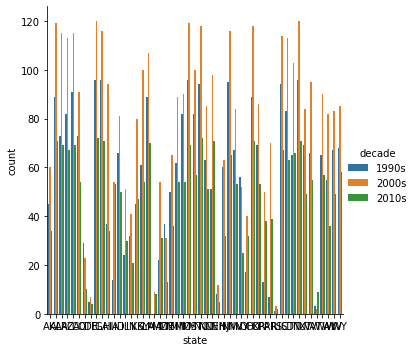

In [51]:
#One more technique
#I made a plot with the new fires_by_decade where I removed fire_year
fires_by_decade
sns.catplot(data=fires_by_decade, kind='count', x='state',hue='decade')
